In [1]:
# Importing potential field filters function from *derivative* libraries
import derivative

In [2]:
# Importing *rtp* function from equivalent layer library
from equivalentlayer import my_rtp_layer

In [3]:
# Import the time computation
from time import time

In [4]:
# Import the correlation function from statistical module
from statistical import my_correlation_coef
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
import time
import os

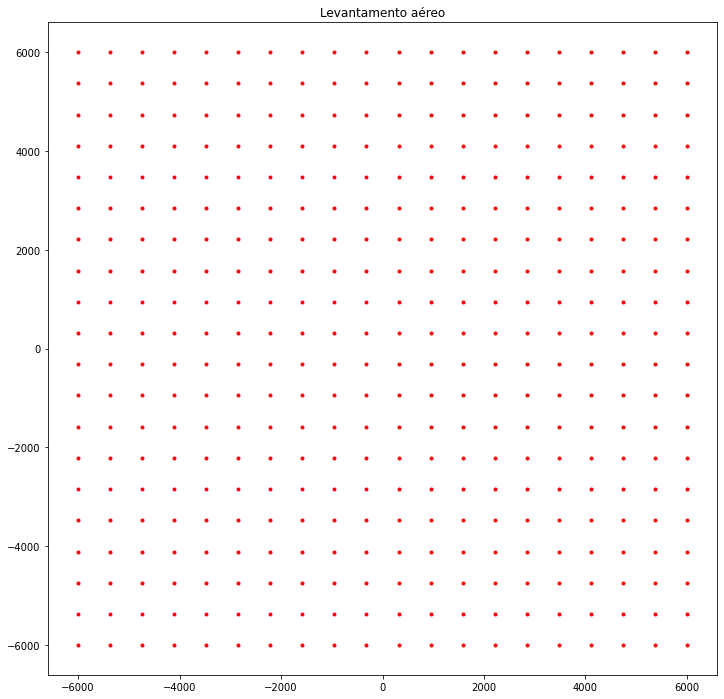

In [5]:
a = sys.path.append('../modules/')
a = sys.path.append('../codes/')
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators_array, aux_operators_array, graphs_and_dist



os.chdir('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Logfile/04_08_2022_08_45')
data_cubo = pd.read_table('data_mag.csv', sep=',')
anomaly_cubo = np.reshape(np.array(data_cubo['Anomalia Magnética(nT)']), (20,20))

momento = 3.8e10 / 20  # 3.8X10^10/ndip
# print(momento)

acquisition = {'nx': 20,
               'ny': 20,
               'ymax': data_cubo['East(m)'].max(),
               'ymin': data_cubo['East(m)'].min(),
               'xmax': data_cubo['North(m)'].max(),
               'xmin': data_cubo['North(m)'].min(),
               'z': -50.0,
               'color': '.r'}

x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

In [6]:
shp = (20, 20)
import prism, sphere, filtering, grids
inc, dec = -33.0, -44.0
I, D =  5.0, 70.0

In [7]:
rtpdata = filtering.reduction(X.reshape(shp), Y.reshape(shp), anomaly_cubo.reshape(shp), inc, dec, I, D)

/home/romulo/my_project_dir/Inversao_magnetica/codes/romulo/auxiliars.py:409: RuntimeWarning: invalid value encountered in true_divide
  theta = z + ((x*u + y*v)/k)*1j


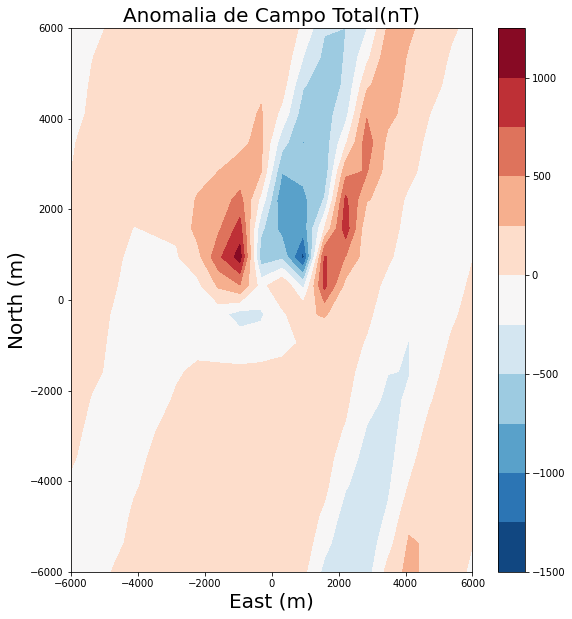

In [8]:
%matplotlib inline
#xs = [x1, x1, x2, x2, x1]
#ys = [y1, y2, y2, y1, y1]

#xs1 = [pointx[0], pointx[0], pointx[5], pointx[5], pointx[0]]

#ys1 = [pointy[0], pointy[5], pointy[5], pointy[0], pointy[0]]

#flechax = [[numpy.absolute(pointx[0] + pointx[5])], [pointx[5]]]
#flechay = [[numpy.absolute(pointy[0] + pointy[5])], [pointy[5]]]


#origin = [[numpy.absolute(pointx[0] + pointx[5])], [[numpy.absolute(pointy[0] + pointy[5])]]]
#ponta = [[pointx[5]], [pointy[5]]]

#print(ponta)

# graficos
plt.close('all')
plt.figure(figsize=(9,10))
#******************************************************
#copia = plt.contour(Y, X, tfa_final, levels = 16, cmap = 'jet', linewidths = 2)
#plt.clabel(copia , inline=2, fontsize=12, colors = 'k')
#plt.set(copia,'LineWidth',[5])
original = plt.contourf(Y.reshape(shp), X.reshape(shp), rtpdata.reshape(shp), 10, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
#corpo, = plt.plot(ys1,xs1,'k-*', label = 'Extensão do Dique')
#plt.plot(ys2,xs2,'k-')
#plt.plot(ys3,xs3,'m-')
#arrow = plt.arrow(2000.0, 0.0, 4500.0, 0.0, width=250, length_includes_head = True, color = 'k')
#first_legend = plt.legend(handles=[corpo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, corpo], ['Direção de mergulho', 'Extensão do Dique'], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()